# Data Analysis
The data analysis is crucial for the understanding of the raw counter/KPI dataset. It includes some data pre-processing (removing invalid entries, missing data handling, etc.) as well as analysis on the counter/KPIs statistics.

## 01 Load CSV Data

### Import Lib

In [109]:
import numpy as np
import pandas as pd
import scipy
from pandas import DataFrame
from pandas import read_csv
import matplotlib.pyplot as plt

### Read csv

In [111]:
# import glob
# load KPIs files from a folder
# files = glob.glob('data/common_files*.csv')
# files = glob.glob("data/common_files*.csv")
# print (files)
df_raw = pd.read_csv("data/common_files_HighLoadAnalysis201812200038255c1a038136d32.csv", encoding = 'gbk')

In [112]:
df_raw.columns

Index(['day', 'hour', 'cellNum', 'subNet', 'cluster', 'site', 'siteType',
       'sitenamechinese', 'location', 'cellNameChinese', '覆盖属性', 'ecgi',
       'Users_RRC_Avg', 'DL_PDSCH_Usage', 'PDCCH_CCE_利用率超过70%的比例',
       'DL_Volume_GB', 'UL_PUSCH_Usage', 'UL_Volume_GB', 'RLC时延',
       'LTE_User_THP_DL_kpbs', 'LTE_User_THP_UL_kpbs', 'CellTputDl_kbps',
       'Uplink Cell Throughput(kbps)', 'MAC层下行BLER', 'MAC层上行BLER',
       'RLC层下行重传率(%)', 'RLC层上行重传率(%)', 'SRfail占SR的比例'],
      dtype='object')

In [139]:
df_clean =  df_raw[['day', 'hour', 'location','Users_RRC_Avg', 'DL_PDSCH_Usage', 'PDCCH_CCE_利用率超过70%的比例',
       'DL_Volume_GB', 'UL_PUSCH_Usage', 'UL_Volume_GB', 'RLC时延',
       'LTE_User_THP_DL_kpbs', 'LTE_User_THP_UL_kpbs', 'CellTputDl_kbps',
       'Uplink Cell Throughput(kbps)', 'MAC层下行BLER', 'MAC层上行BLER',
       'RLC层下行重传率(%)', 'RLC层上行重传率(%)', 'SRfail占SR的比例']].copy()


In [114]:
# get highload cell data
# dftemp = pd.read_csv('highloadcell.csv',encoding = 'gbk')
# df_result = df_clean.join(dftemp.set_index('location'),on='location',how='inner')
# df_result.columns = ['day','hour','cell','Users_RRC_Max','Users_RRC_Avg','DL_PDSCH_Usage','DL_PDCCH_Usage','DL_Volume','UL_PUSCH_Usage','UL_Volume','Time_Delay']
# df_result.head(50)
# df_result.to_csv('result.csv')

In [115]:
# df_clean.to_csv('data/changzhou1101/data_raw.csv')

In [13]:
# df_clean_show[df_clean_show['location'] == 'LD31E42B'].sort_values(by=['day', 'hour'])

In [140]:
df_clean.columns = ['day','hour','cell', 'Users_RRC_Avg', 'PDSCH_Usage_DL',
       'PDCCH_CCE_Above_70', 'DL_Volume_GB', 'PUSCH_Usage_UL', 'UL_Volume_GB',
       'RLC_Time_Delay', 'User_THP_DL_kbps', 'User_THP_UL_kbps',
       'Cell_THP_Dl_kbps', 'Cell_THP_UL_kbps',
       'MAC_Retransmission_DL', 'MAC_Retransmission_UL', 'RLC_Retransmission_DL', 'RLC_Retransmission_UL','SRfail_RAatt']

In [142]:
# 删除RLC重传率相关的两个指标
df_clean.drop(['RLC_Retransmission_DL', 'RLC_Retransmission_UL'], axis=1, inplace=True)

In [130]:
print("# of df_clean before dropna:", len(df_clean))
df_clean.dropna(inplace = True)
print("# of df_clean after dropna:", len(df_clean))

# of df_clean before dropna: 622669
# of df_clean after dropna: 585214


In [145]:
df_clean.shape

(585214, 17)

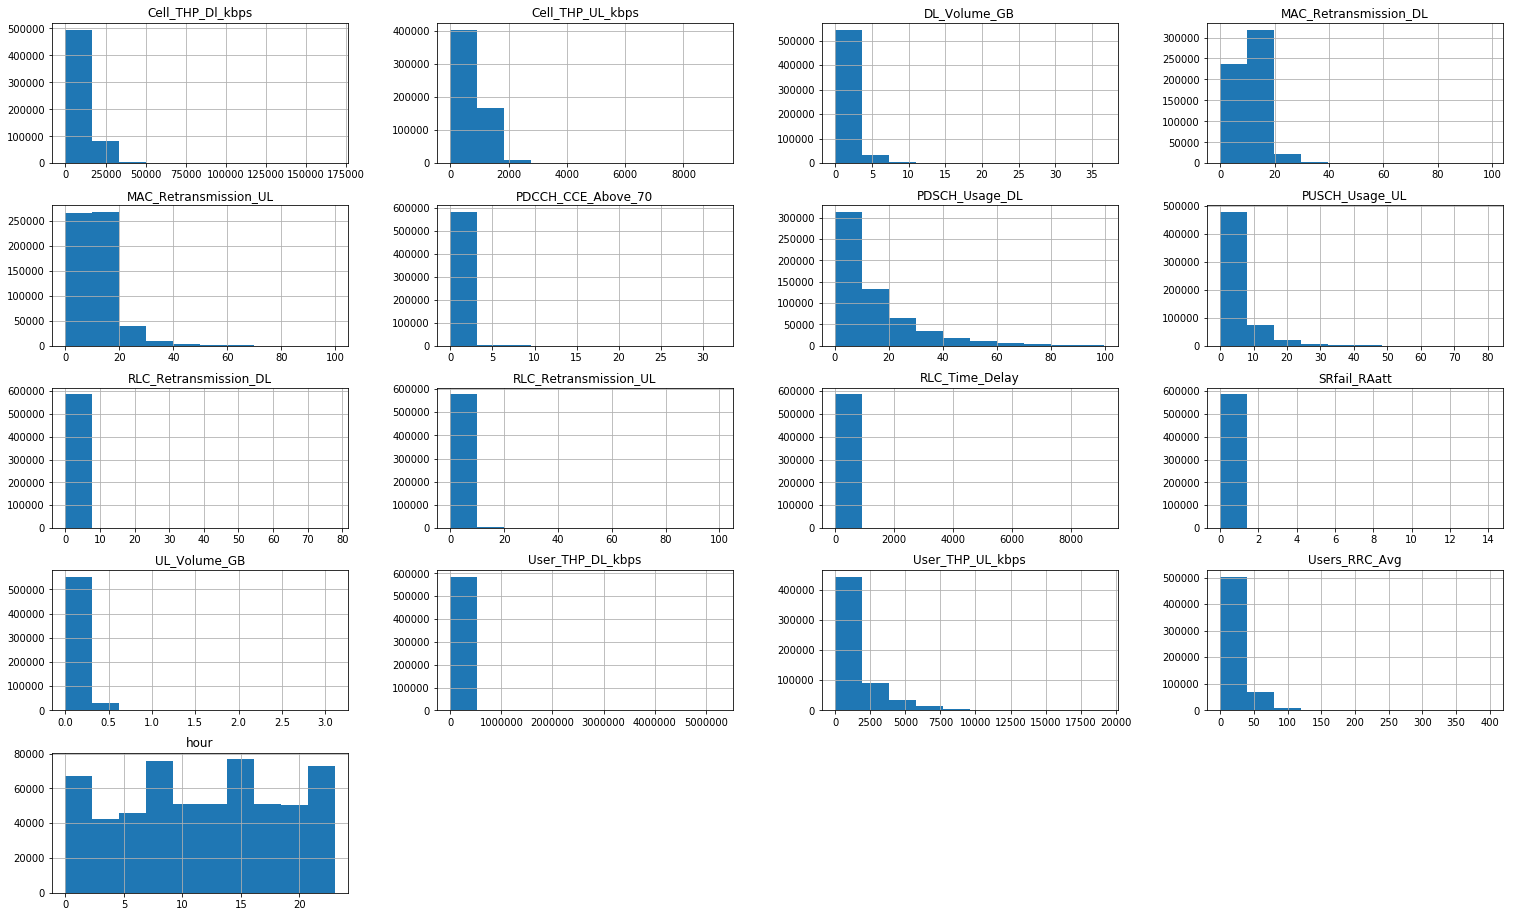

In [119]:
df_clean.hist(figsize=(26, 16))
plt.show()

## 03 Normalization

In [146]:
df_normal = df_clean.copy()

In [147]:
df_normal.head()

,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,SRfail_RAatt
0,12/18/2018,0,LD31C01A,5.87,5.67,0.0,0.42,0.82,0.02,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.0
1,12/18/2018,0,LD31C01B,4.29,1.57,0.0,0.01,0.15,0.00,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.0
2,12/18/2018,0,LD31C01C,6.54,4.31,0.0,0.41,0.50,0.01,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.0
3,12/18/2018,0,LD31I40A,4.12,2.69,0.0,0.11,0.35,0.00,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.0
4,12/18/2018,0,LD31I40B,7.13,4.92,0.0,0.60,1.55,0.03,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.0


In [148]:
# modify the num of days according to days of data
day = 1
df_normal = df_normal.groupby(['cell']).filter(lambda group: len(group) == 24 * day)

In [149]:
df_normal.head()

,day,hour,cell,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,SRfail_RAatt
0,12/18/2018,0,LD31C01A,5.87,5.67,0.0,0.42,0.82,0.02,3.04,39307.00,2166.66,10600.53,313.06,8.34,2.58,0.0
1,12/18/2018,0,LD31C01B,4.29,1.57,0.0,0.01,0.15,0.00,3.43,47408.64,1822.22,4951.13,648.95,6.38,5.18,0.0
2,12/18/2018,0,LD31C01C,6.54,4.31,0.0,0.41,0.50,0.01,27.83,34727.37,1331.36,18777.70,550.92,9.90,3.46,0.0
3,12/18/2018,0,LD31I40A,4.12,2.69,0.0,0.11,0.35,0.00,27.07,24228.84,1030.28,11118.59,673.89,12.17,11.07,0.0
4,12/18/2018,0,LD31I40B,7.13,4.92,0.0,0.60,1.55,0.03,26.53,53875.94,1777.93,19964.56,881.02,8.69,7.94,0.0


In [150]:
df_normal = df_normal.sort_values(by=['cell','day','hour'])

In [151]:
df_normal.describe()

,hour,Users_RRC_Avg,PDSCH_Usage_DL,PDCCH_CCE_Above_70,DL_Volume_GB,PUSCH_Usage_UL,UL_Volume_GB,RLC_Time_Delay,User_THP_DL_kbps,User_THP_UL_kbps,Cell_THP_Dl_kbps,Cell_THP_UL_kbps,MAC_Retransmission_DL,MAC_Retransmission_UL,SRfail_RAatt
count,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,4.424400e+05,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000,442440.000000
mean,11.500000,23.742999,16.362220,0.124878,1.330321,5.477691,0.103328,33.803569,2.376658e+04,1239.526134,10551.654509,812.891195,11.093051,11.784803,0.004666
std,6.922194,21.462293,15.636611,0.862839,1.504044,6.642831,0.127991,34.222235,1.634038e+04,1375.417666,5943.806368,402.892232,4.572455,6.458078,0.044289
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,1.190000,0.000000e+00,0.260000,8.940000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,8.860000,5.170000,0.000000,0.290000,1.120000,0.020000,16.680000,1.349721e+04,348.650000,6600.362500,534.630000,8.610000,7.810000,0.000000
50%,11.500000,17.400000,11.140000,0.000000,0.840000,3.140000,0.060000,28.080000,2.022404e+04,733.330000,9630.710000,740.155000,10.680000,10.710000,0.000000
75%,17.250000,31.840000,22.150000,0.000000,1.850000,7.280000,0.140000,43.320000,3.059980e+04,1578.772500,13337.610000,1008.360000,12.860000,14.220000,0.000000
max,23.000000,399.330000,99.740000,31.970000,26.530000,80.480000,3.110000,9136.060000,4.598111e+06,16243.500000,138973.290000,8323.580000,93.740000,99.740000,9.810000


In [152]:
kpi_list = ['Users_RRC_Avg', 'PDSCH_Usage_DL',
       'PDCCH_CCE_Above_70', 'DL_Volume_GB', 'PUSCH_Usage_UL', 'UL_Volume_GB',
       'RLC_Time_Delay', 'User_THP_DL_kbps', 'User_THP_UL_kbps',
       'Cell_THP_Dl_kbps', 'Cell_THP_UL_kbps',
       'MAC_Retransmission_DL', 'MAC_Retransmission_UL',
       'SRfail_RAatt']
# 'RLC_Retransmission_DL', 'RLC_Retransmission_UL'

In [153]:
print(np.percentile(df_normal['Users_RRC_Avg'],90))
print(np.percentile(df_normal['PDSCH_Usage_DL'],90))
print(np.percentile(df_normal['PDCCH_CCE_Above_70'],90))
print(np.percentile(df_normal['DL_Volume_GB'],90))
print(np.percentile(df_normal['PUSCH_Usage_UL'],90))
print(np.percentile(df_normal['UL_Volume_GB'],90))
print(np.percentile(df_normal['RLC_Time_Delay'],90))
print(np.percentile(df_normal['User_THP_DL_kbps'],90))
print(np.percentile(df_normal['User_THP_UL_kbps'],90))
print(np.percentile(df_normal['Cell_THP_Dl_kbps'],90))
print(np.percentile(df_normal['Cell_THP_UL_kbps'],90))
print(np.percentile(df_normal['MAC_Retransmission_DL'],90))
print(np.percentile(df_normal['MAC_Retransmission_UL'],90))
# print(np.percentile(df_normal['RLC_Retransmission_DL'],90))
# print(np.percentile(df_normal['RLC_Retransmission_UL'],90))
print(np.percentile(df_normal['SRfail_RAatt'],90))

51.22
37.42
0.06
3.22
13.56
0.26
62.781
43543.759
3045.793
17832.36
1307.35
15.75
18.83
0.01


In [154]:
kpi_list

['Users_RRC_Avg',
 'PDSCH_Usage_DL',
 'PDCCH_CCE_Above_70',
 'DL_Volume_GB',
 'PUSCH_Usage_UL',
 'UL_Volume_GB',
 'RLC_Time_Delay',
 'User_THP_DL_kbps',
 'User_THP_UL_kbps',
 'Cell_THP_Dl_kbps',
 'Cell_THP_UL_kbps',
 'MAC_Retransmission_DL',
 'MAC_Retransmission_UL',
 'SRfail_RAatt']

In [155]:
# pdf_90归一化
# kpi_list_90pdf = ['Users_RRC_Avg', 'DL_Volume_GB', 'UL_Volume_GB']
df_normal_use_pdf90 = df_normal.copy()
def getmax(x,y):
    if x<y:
        return 0
    else:
        return (x-y)/x
for kpi in kpi_list:
    if kpi not in ['RLC_Retransmission_DL', 'RLC_Retransmission_UL', 'SRfail_RAatt', 'PDCCH_CCE_Above_70']:
        base = np.percentile(df_normal_use_pdf90[kpi],90)
        df_normal_use_pdf90[kpi] = df_normal_use_pdf90[kpi].apply(lambda x:getmax(x,base))
#     df_normal_use_pdf90[kpi] = (df_normal_use_pdf90[kpi] - base) / df_normal_use_pdf90[kpi]

In [104]:
# min-max 归一化
# max设为大于均值的三倍标准差
df_normal_use_minmax = df_normal.copy()
max_use = df_normal[kpi_list].mean() + 3 * df_normal[kpi_list].std()
min_use = df_normal[kpi_list].min()
df_normal_use_minmax[kpi_list] = (df_normal_use_minmax[kpi_list] - min_use) / (max_use - min_use)

In [29]:
# df_normal_use_minmax[kpi_list].describe()

In [28]:
# df_normal_use_minmax[kpi_list].hist(figsize=(26, 16))

In [30]:
# for kpi_name in df_normal.columns.difference(['day','hour', 'cell']):
#     # Plot Boxplots
#     # Define plot size
#     fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

#     # Plot B1 boxplots
# #     ax1.boxplot(df_clean[kpi_name], labels=['changzhou'],whis=[0, 95], showfliers=True)
#     ax1.boxplot(df_clean[kpi_name], labels=['changzhou'])
# #     ax1.boxplot.stats
#     # Define plot characterisitcs
#     ax1.set_title(kpi_name)
#     ax1.set_ylabel(kpi_name)

#     plt.show()
# #     fig.savefig('kpi_plot/'+kpi_name+".pdf", bbox_inches='tight')

In [31]:
# import math

# df_normalInd = df_normal[df_normal.columns.difference(['day','hour', 'cell'])]

# #Z-score标准化
# df_normalIndZscore = (df_normalInd-df_normalInd.mean())/df_normalInd.std()
# #df_normalIndZscore.head(5)
# df_normal[df_normal.columns.difference(['day','hour', 'cell'])] = df_normalIndZscore
# df_normal.head(5)


In [105]:
# norm_max = [100, 76, 4, 7, 38, 0.6, 142, 73, 7, 35000, 2500, 20, 20, 2, 14, 3 ]
# norm_dict = dict(zip(kpi_list, norm_max))

nb_kpis = len(kpi_list)
nb_hours = 24
nb_features = nb_kpis * nb_hours


In [140]:
# for i in range(len(kpi_list)):
#     xmin = df_normal[kpi_list[i]].min()
#     df_normal.loc[(df_normal[kpi_list[i]] > norm_dict[kpi_list[i]]),kpi_list[i]] = norm_dict[kpi_list[i]]
#     df_normal[kpi_list[i]] = (df_normal[kpi_list[i]] -xmin) / (norm_dict[kpi_list[i]] -xmin)

In [33]:
# df_normal.hist(figsize=(26, 16))
# plt.show()

In [34]:
# for kpi_name in df_normal.columns.difference(['day','hour', 'cell']):
#     # Plot Boxplots
#     # Define plot size
#     fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 20))

#     # Plot B1 boxplots
#     ax1.boxplot(df_normal[kpi_name], labels=['changzhou'])

#     # Define plot characterisitcs
#     ax1.set_title(kpi_name)
#     ax1.set_ylabel(kpi_name)

#     plt.show()
#     fig.savefig('kpi_plot/zscore_'+kpi_name+".pdf", bbox_inches='tight')

## 04 Wide Table

In [107]:
def gen_save_wide_table(df_normal, name):
    """
    generate wide table per given datasets after normalization
    """
    df_normal_wide = pd.DataFrame(df_normal.groupby(['cell', 'day', 'hour']).sum().unstack(['day','hour']))
    df_normal_wide.to_csv("data/data_wide_{}.csv".format(name))


In [108]:
gen_save_wide_table(df_normal_use_minmax, name="min_max")
gen_save_wide_table(df_normal_use_pdf90, name="pdf90")

In [68]:
df_normal_wide = pd.DataFrame(df_normal.groupby(['cell', 'day', 'hour']).sum().unstack(['day','hour']))

In [69]:
feature_data = np.array(df_normal_wide)

In [70]:
df_cellname = df_normal_wide.index.values

In [71]:
df_cellname

array(['LA3LK31B', 'LA3LK31D', 'LA3LK31E', ..., 'LF3LJ42B', 'LF3LJ42C',
       'LF3LJ44A'], dtype=object)

In [72]:
df_normal_wide.head()

Users_RRC_Avg                                              ...   \
day         12/18/2018                                              ...    
hour                0    1    2    3    4    5    6    7    8    9  ...    
cell                                                                ...    
LA3LK31B           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LA3LK31D           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LA3LK31E           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LD31A01B           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    
LD31A03A           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...    

         SRfail_RAatt                                               
day        12/18/2018                                               
hour               14   15   16   17   18   19   20   21   22   23  
cell                                                                
LA3LK31B          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LA3LK31D          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LA3LK31E          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LD31A01B          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
LD31A03A          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 384 columns]

In [80]:
df_normal_wide.to_csv("data/data_wide_pdf90.csv")

In [74]:
feature_data.shape[0]  # 小区个数

18435

In [75]:
feature_data_2d = feature_data.reshape(feature_data.shape[0], nb_kpis, 24,1)  # [小区个数，指标个数，小时数，日期]

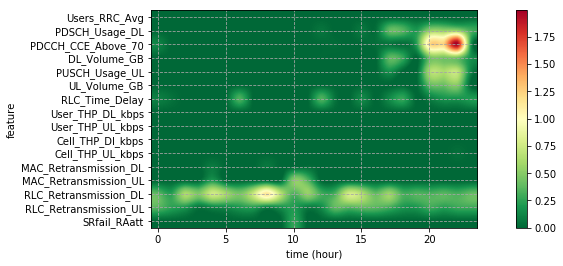

In [76]:
# visualize a sample

# ls_feat = ['DL_PDCCH_Usage', 'DL_PDSCH_Usage', 'DL_Volume', 'UL_PUSCH_Usage', 'UL_Volume']
plt.rcParams["figure.figsize"] = (14, 4)
data =  feature_data_2d[0,:,:,0] # 第一个小区第一天的各指标在每个小时的数据
#plt.xkcd()
im=plt.imshow(data, interpolation='spline16', cmap=plt.cm.get_cmap('RdYlGn_r'))
#plt.clim(0,1)
plt.colorbar(im)
plt.xlabel('time (hour)')
plt.yticks(range(len(kpi_list)), kpi_list)
plt.ylabel('feature')
plt.grid(b=True, which='both', color='0.65', linestyle='--')

plt.show()